In [1]:
import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np
ipo_df = pd.read_csv("C:/Users/davir/davigit/Projeto_Intro_CD/datasets/IPO_1521.csv")
precoipo = pd.read_csv("C:/Users/davir/davigit/Projeto_Intro_CD/datasets/preco_abe_ipo.csv")
sns.set_palette('Dark2')

In [2]:
tickers = ["PSVM11" , "WIZS3" ,  "AALR3" , "MOVI3" , "PARD3", "AZUL4", "CRFB3", "IRBR3", "OMGE3", "CAML3", 
                  "BKBR3", "BRDT3", "GNDI3", "HAPV3", "BIDI4", "SBFG3","NEOE3", "VIVA3", "BMGB4", "CEAB3", 
                  "MTRE3", "LWSA3", "MDNE3", "PRNR3", "ALPK3", "AMBP3", "SOMA3", "DMVF3", "LJQQ3", "LAVV3", 
                  "PGMN3", "PETZ3", "PLPL3", "MELK3", "HBSA3", "CURY3", "BOAS3", "SEQL3", "GMAT3", "TFCO4", 
                  "CASH3", "ENJU3", "AERI3", "RRRP3", "AVLL3", "RDOR3", "NGRD3"]
openings = list(precoipo['preco'])

In [3]:
tickers.extend(["HBRE3", "VAMO3", "ESPA3", "INTB3", "MOSI3", "MBLY3", "JALL3", "POWE3", "CSED3", "OPCT3", 
           "ORVR3", "ELMD3", "BMOB3", "CMIN3", "WEST3", "MODL11", "MATD3", "BLAU3", "GGPS3", "SOJA3",
           "RECV3", "CXSE3"])
openings.extend([19.10, 26, 17.9, 15.75, 19.8, 21, 8.3, 18.02, 14, 11.15, 22, 17.81, 22, 8.5, 13, 20, 17.44, 40.14, 
            12, 9.9, 14.75, 9.67])
dict_tickers = dict(zip(tickers, openings))

In [4]:
date_list = []
for ticker in tickers:
    df = ipo_df[ipo_df.codneg==ticker]
    date_list.append(df["date"].iloc[0])
    
date_ipo_df = pd.DataFrame(list(zip(tickers, date_list)), columns=["tickers", "date"])
date_ipo_df["date"] = pd.to_datetime(date_ipo_df["date"], format='%Y-%m-%d')
date_ipo_df

,tickers,date
0,PSVM11,2015-03-10
1,WIZS3,2015-06-05
2,AALR3,2016-10-28
3,MOVI3,2017-02-08
4,PARD3,2017-02-14
...,...,...
64,BLAU3,2021-04-19
65,GGPS3,2021-04-26
66,SOJA3,2021-04-29
67,RECV3,2021-05-05


In [5]:
lista = []
for i in range(2015, 2022):
    quant = date_ipo_df[date_ipo_df['date'].dt.year == i].count()[0]
    lista.append(quant)

ipos_per_year = list(zip([str(i) for i in range(2015, 2022)], lista))
ipos_per_year = pd.DataFrame(ipos_per_year, columns=["Year", "Quantity"])
ipos_per_year

,Year,Quantity
0,2015,2
1,2016,1
2,2017,9
3,2018,3
4,2019,5
5,2020,27
6,2021,22


In [6]:
def rentability(ticker, dias_uteis, dict_ticker=dict_tickers, data=ipo_df):
    ticker = ticker.upper()
    df = data[data.codneg==ticker]
    df = df.reset_index(drop=True)
    variation = ((df["preult"].iloc[dias_uteis-1]/dict_ticker[ticker])-1)*100
    return variation

In [7]:
rent_1d = pd.DataFrame(columns=["1D"])
time = [1]
for t in tickers:
    rent_1d.loc[t] = [rentability(t, c) for c in time]
    

## Quantity of IPO's per Year

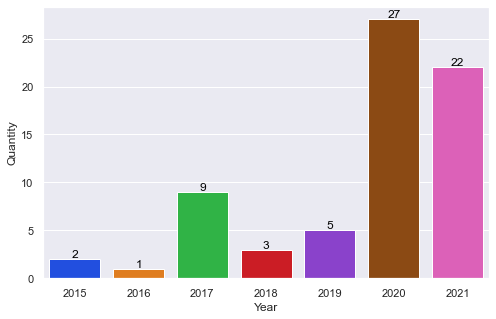

In [24]:
sns.set(rc={'figure.figsize':(8,5)})
sns.set_palette('bright')
quant_year_b = sns.barplot(x="Year", y="Quantity", data=ipos_per_year)
for index, row in ipos_per_year.iterrows():
    quant_year_b.text(row.name, row.Quantity+0.175, round(row.Quantity,2), color="black", ha="center")

## IPO ETF

In [9]:
rent_by_day = ipo_df.pivot_table(values='preult', index='date', columns='codneg')
for c in rent_by_day:
    rent_by_day[c] = ((rent_by_day[c] / dict_tickers[c]) - 1)* 100

rent_by_day_mean = rent_by_day.mean(axis=1)
rent_by_day_mean = pd.DataFrame(data=rent_by_day_mean, columns=['variation'])
rent_by_day_mean = rent_by_day_mean.reset_index()

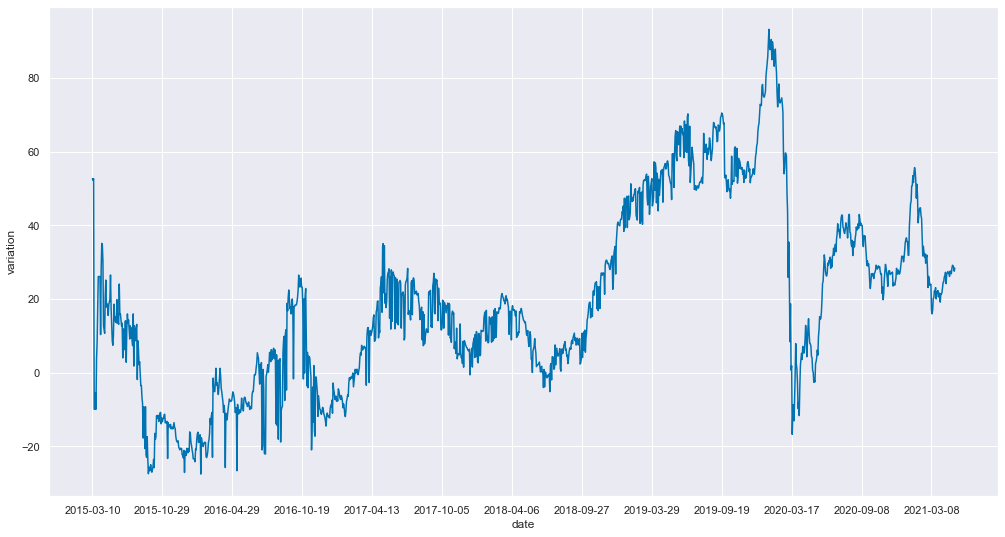

In [42]:
sns.set(rc={'figure.figsize':(17,9)})
sns.set_palette('colorblind')
loc = plticker.MultipleLocator(base=120.0)
axes = sns.lineplot( data=rent_by_day_mean, x='date', y='variation')
axes.xaxis.set_major_locator(loc)

## Mean Rentability 

## Comparison Rentability 2015-2019 and 2020

## Deaths by Covid and Volatility

## Correlation Death x Volatility

## Histogram IPO's Return of first day closing


<AxesSubplot:xlabel='1D', ylabel='Count'>

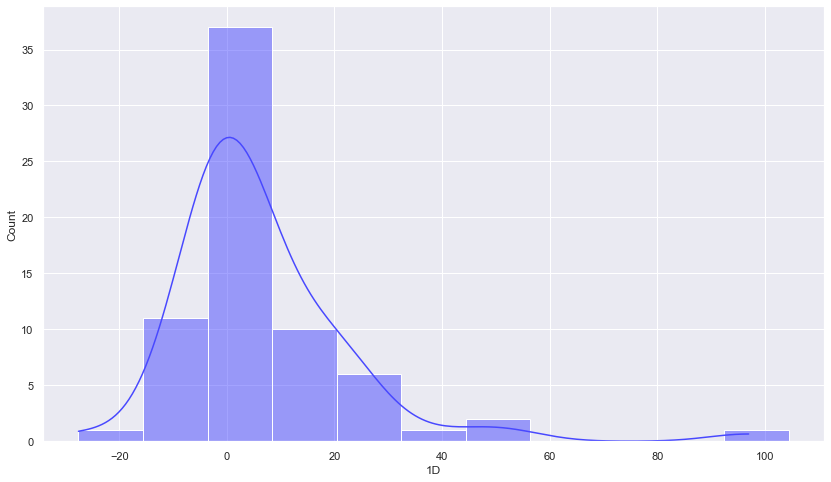

In [35]:
sns.set(rc={'figure.figsize':(14,8)})
sns.set_palette('bwr')
sns.histplot(rent_1d, x='1D', binwidth=12, kde=True)

## Comparison 'IPO ETF' and IBOVESPA